# Case Study - Leads Scoring for X Education


##### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.



The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


##### Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
#importing the leads dataset

leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### EXPLORATORY DATA ANALYSIS
### Data understanding, preparation

In [6]:
#check for duplicates

sum(leads.duplicated(subset = 'Prospect ID')) == 0
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values found in Prospect ID & Lead Number

Prospect ID & Lead Number are unique numbers and it is not required for the analysis.

In [7]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [8]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [10]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

,0
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
Country,26.63


In [11]:
#dropping cols with more than 45% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, axis=1, inplace = True)

In [12]:
#checking null values percentage after dropping 45%

round(100*(leads.isnull().sum()/len(leads.index)), 2)

,0
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
Country,26.63


##### Categorical Attributes Analysis:

In [13]:
#checking value counts of Country column

leads['Country'].value_counts(dropna=False)

,count
Country,
India,6492
NaN,2461
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10


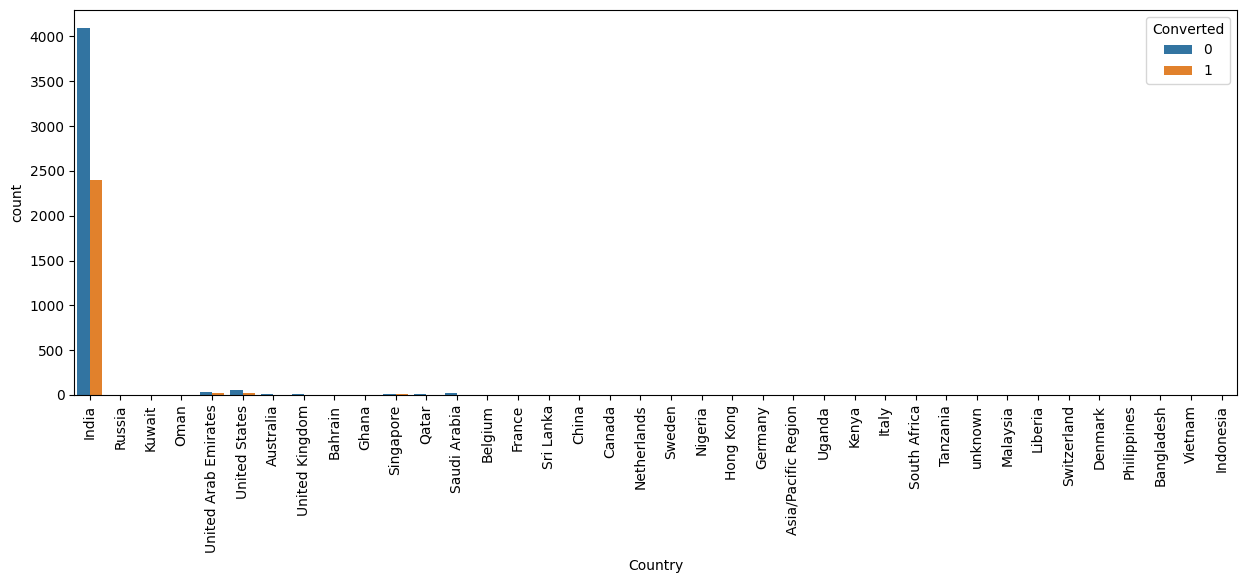

In [14]:
# plotting spread of Country column
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Country', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

As we can see the Number of Values for India are quite high (about 97% of the Data), this column can be dropped

In [15]:
#creating a list of columns to be droppped and adding country

cols_to_drop=['Country']

In [16]:
#checking value counts of "City" column

leads['City'].value_counts(dropna=False)

,count
City,
NaN,3669
Mumbai,3222
Thane & Outskirts,752
Other Cities,686
Other Cities of Maharashtra,457
Other Metro Cities,380
Tier II Cities,74


In [17]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

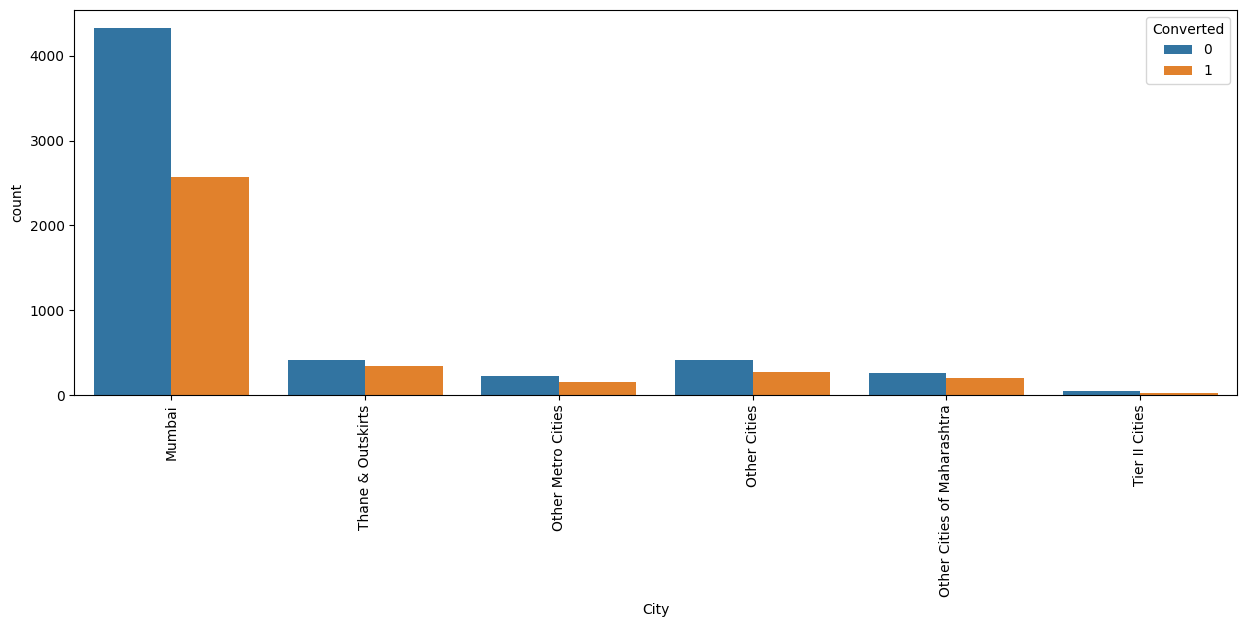

In [18]:
#plotting spread of City columnn after replacing NaN values
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='City', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [19]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

,count
Specialization,
NaN,3380
Finance Management,976
Human Resource Management,848
Marketing Management,838
Operations Management,503
Business Administration,403
IT Projects Management,366
Supply Chain Management,349
"Banking, Investment And Insurance",338


In [20]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

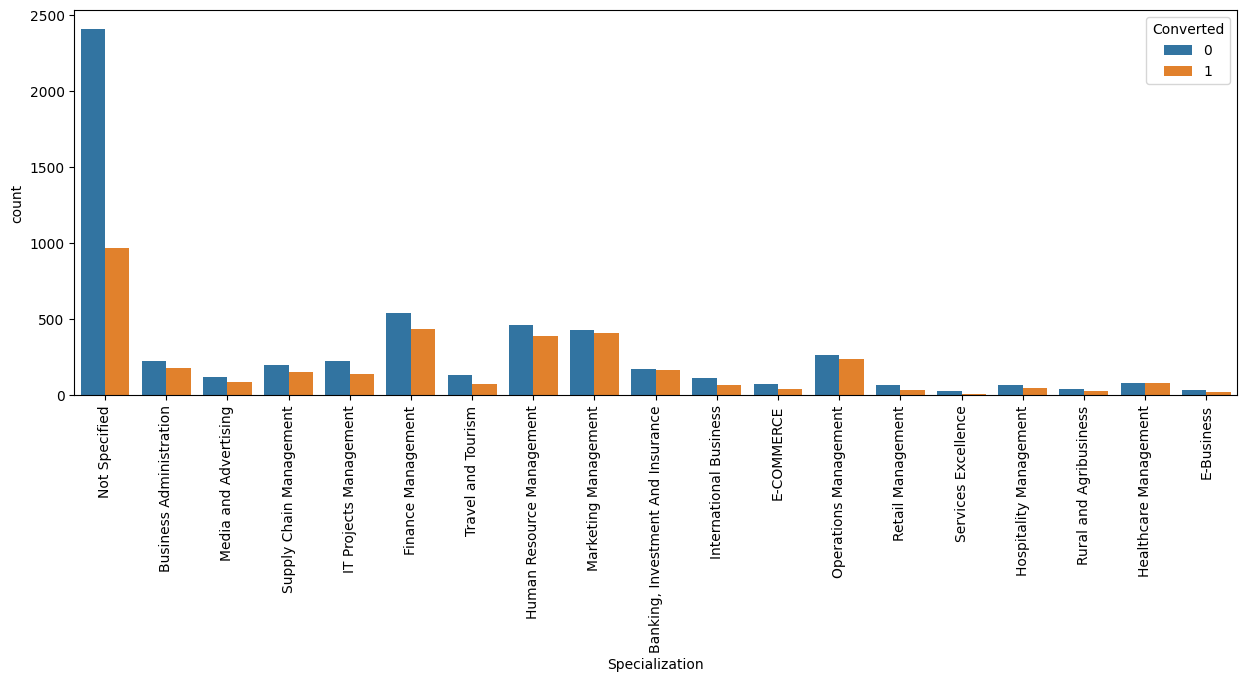

In [21]:
#plotting spread of Specialization columnn

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Specialization', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [22]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

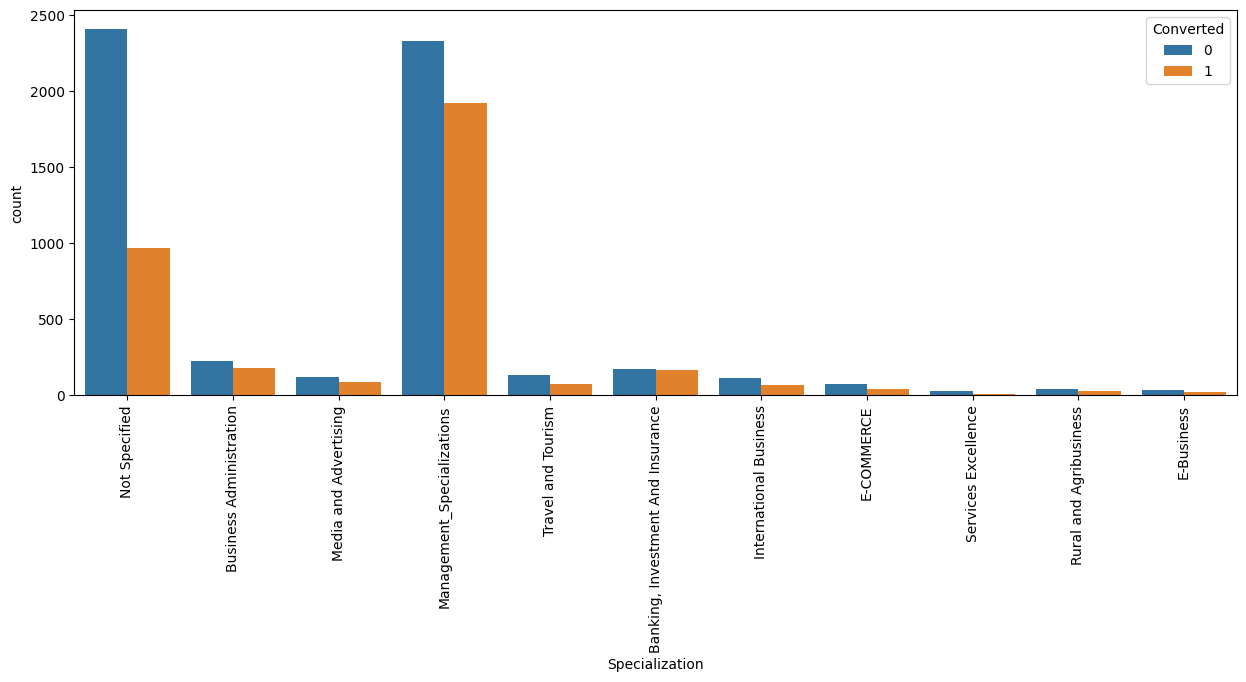

In [23]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Specialization', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [24]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

,count
What is your current occupation,
Unemployed,5600
NaN,2690
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


In [25]:
#imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [26]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

,count
What is your current occupation,
Unemployed,8290
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


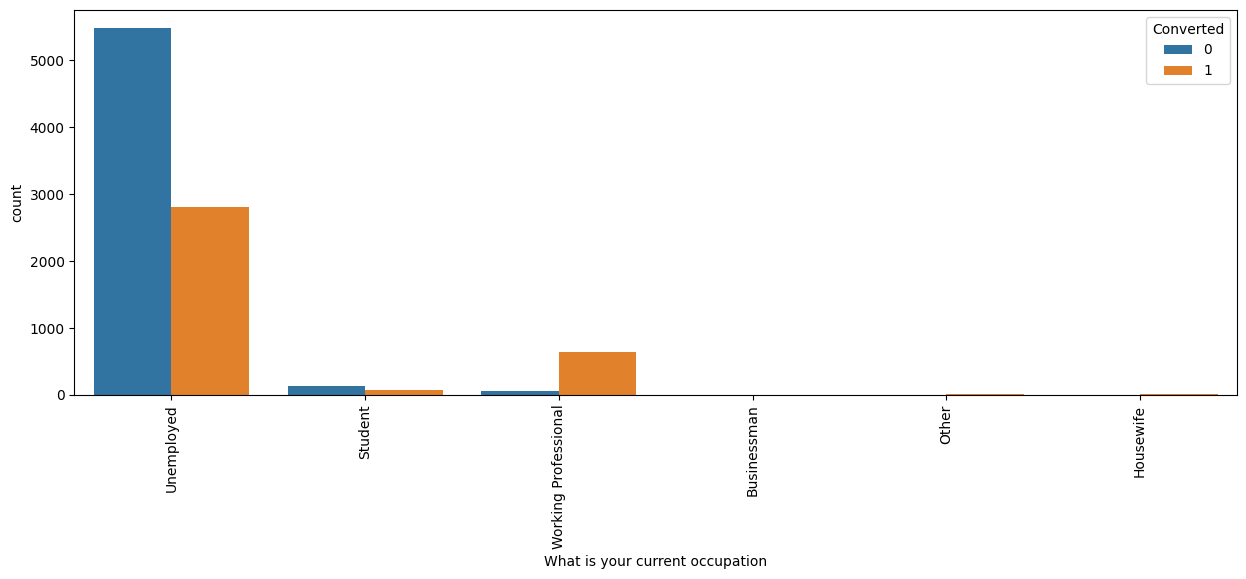

In [27]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='What is your current occupation', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in terms of Absolute numbers.

In [28]:
#checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

,count
What matters most to you in choosing a course,
Better Career Prospects,6528
NaN,2709
Flexibility & Convenience,2
Other,1


In [29]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

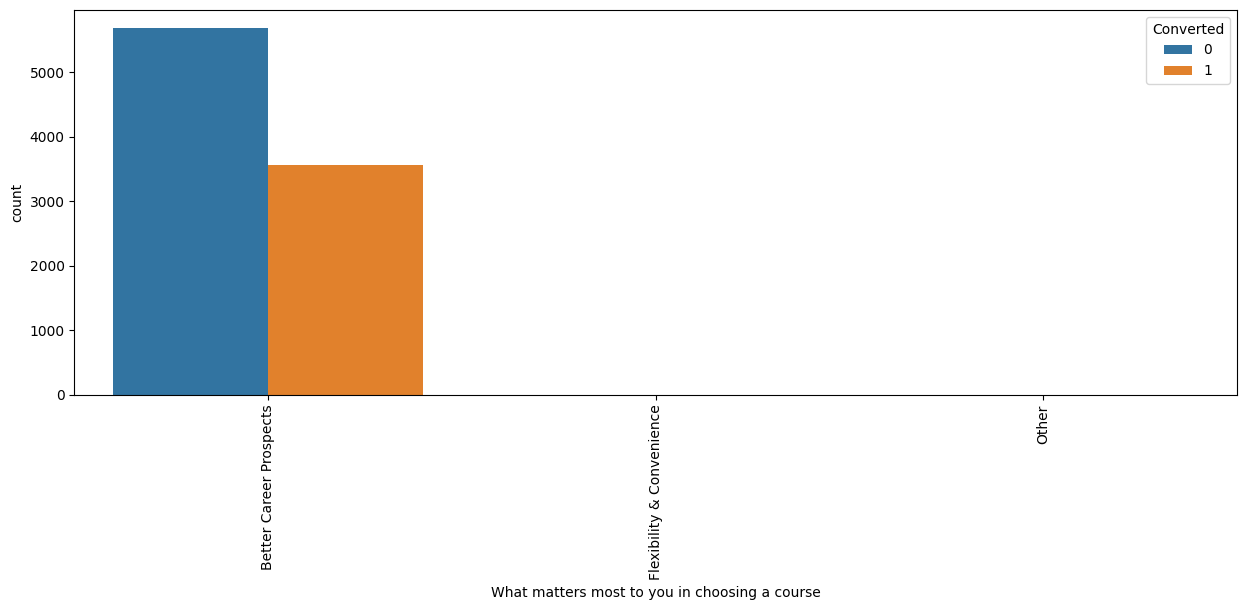

In [30]:
#visualizing count of Variable based on Converted value



plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='What matters most to you in choosing a course', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [31]:
#checking value counts of variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

,count
What matters most to you in choosing a course,
Better Career Prospects,9237
Flexibility & Convenience,2
Other,1


In [32]:
#Here again we have another Column that is worth Dropping becauase of data skewness. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [33]:
#checking value counts of Tag variable
leads['Tags'].value_counts(dropna=False)

,count
Tags,
NaN,3353
Will revert after reading the email,2072
Ringing,1203
Interested in other courses,513
Already a student,465
Closed by Horizzon,358
switched off,240
Busy,186
Lost to EINS,175


In [34]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

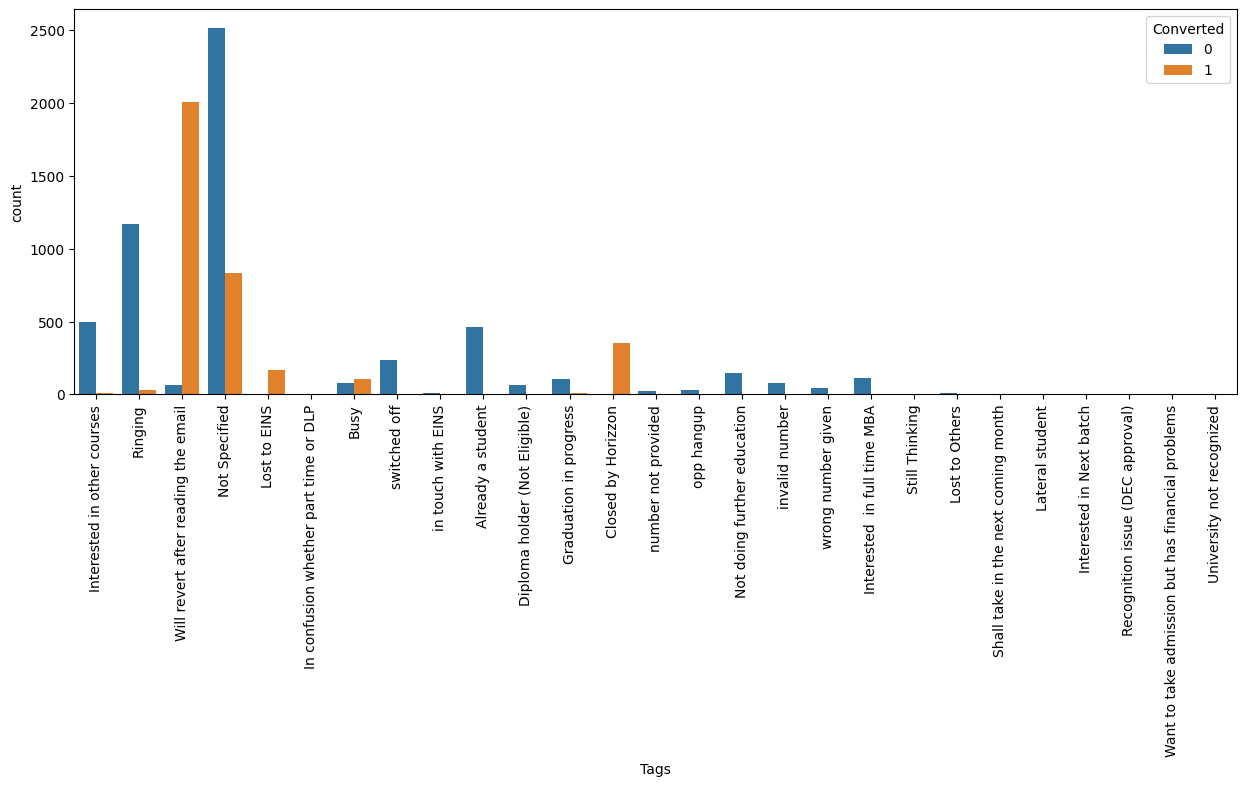

In [35]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Tags', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [36]:
#replacing tags with low frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [37]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

,0
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
Country,26.63


In [38]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

,count
Lead Source,
Google,2868
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
NaN,36


In [39]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

We can group some of the lower frequency occuring labels under a common label 'Others'

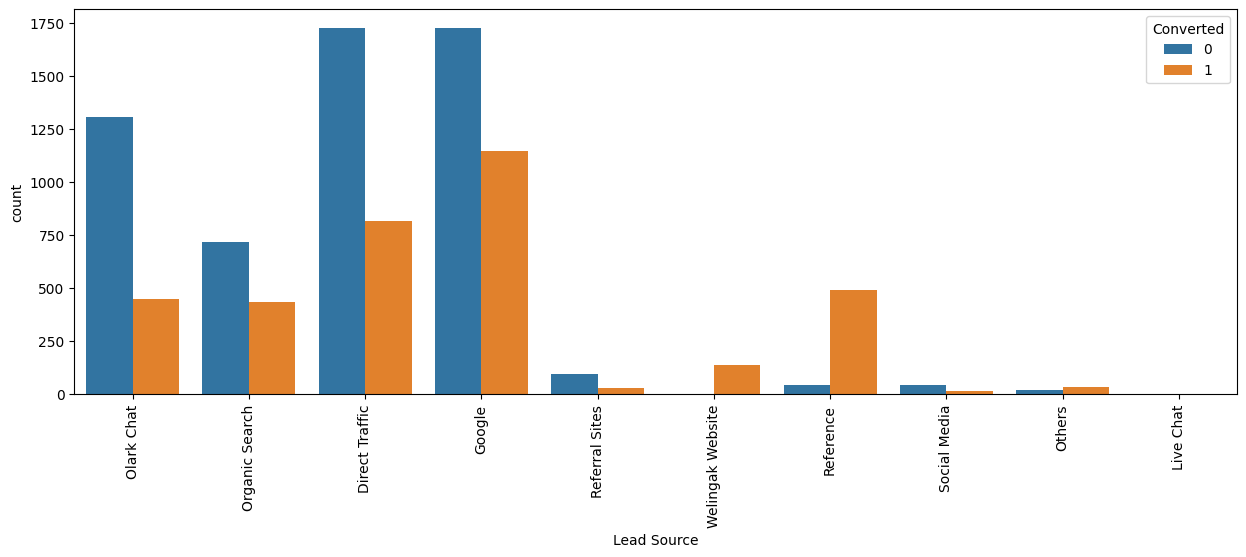

In [40]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Lead Source', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Inference
1. Maximum number of leads are generated by Google and Direct traffic.
2. Conversion Rate of reference leads and leads through welingak website is high.
3. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [41]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

,count
Last Activity,
Email Opened,3437
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Email Link Clicked,267
Form Submitted on Website,116
NaN,103


In [42]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation',
                                                        'Approached upfront',
                                                        'View in browser link Clicked',
                                                        'Email Marked Spam',
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [43]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

,count
Last Activity,
Email Opened,3437
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Others,308
Email Link Clicked,267
Form Submitted on Website,116


In [44]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

,0
Lead Origin,0.00
Lead Source,0.00
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,0.00
Country,26.63


In [45]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [46]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

,0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0
Last Activity,0.0
Country,0.0


In [47]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

,count
Lead Origin,
Landing Page Submission,4850
API,1902
Lead Add Form,27


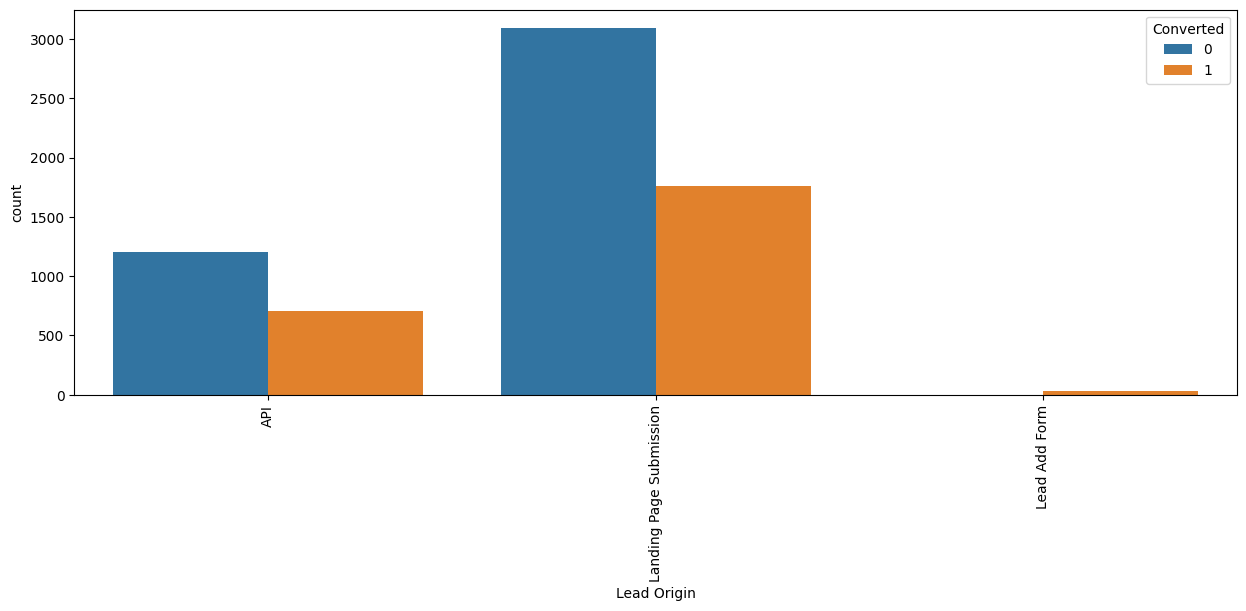

In [48]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Lead Origin', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Inference

1. API and Landing Page Submission bring higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. Lead Import and Quick Add Form get very few leads.
4. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

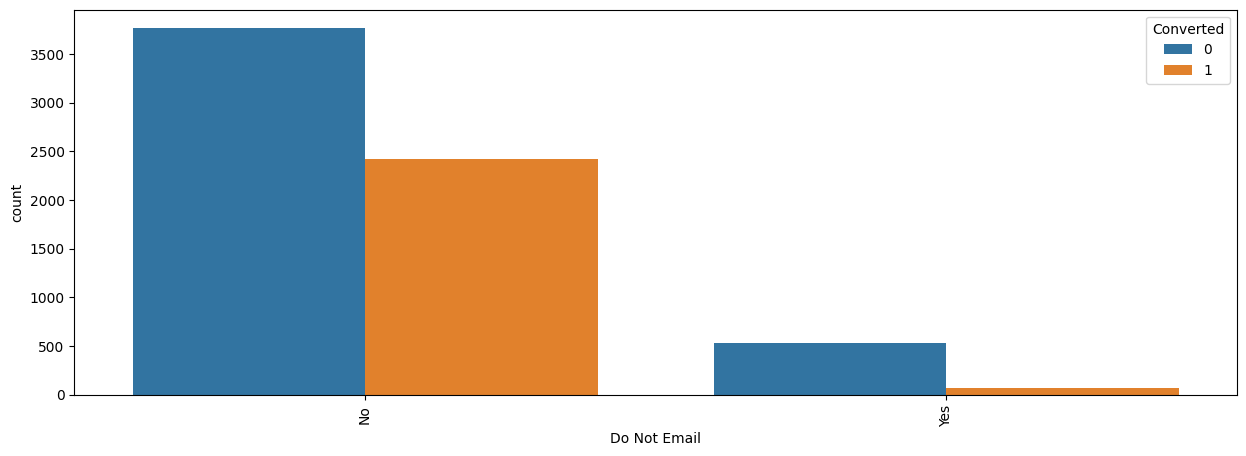

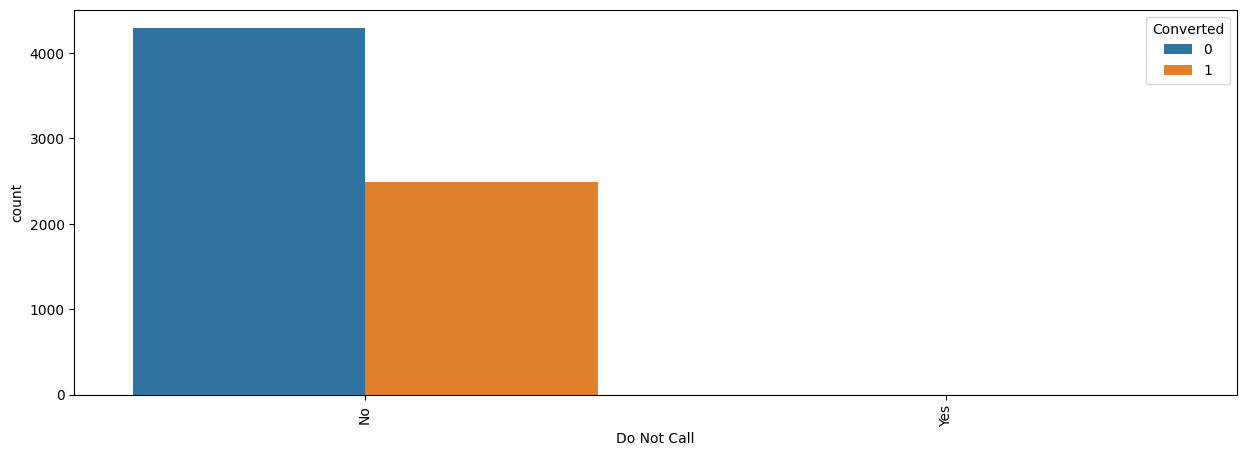

In [49]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
ax = sns.countplot(data=leads, x='Do Not Email', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Do Not Call', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [50]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

,count
Do Not Call,
No,6778
Yes,1


In [51]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

,count
Do Not Email,
No,6186
Yes,593


We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [52]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

IMBALANCED VARIABLES THAT CAN BE DROPPED

In [53]:
leads.Search.value_counts(dropna=False)

,count
Search,
No,6765
Yes,14


In [54]:
leads.Magazine.value_counts(dropna=False)

,count
Magazine,
No,6779


In [55]:
leads['Newspaper Article'].value_counts(dropna=False)

,count
Newspaper Article,
No,6777
Yes,2


In [56]:
leads['X Education Forums'].value_counts(dropna=False)

,count
X Education Forums,
No,6778
Yes,1


In [57]:
leads['Newspaper'].value_counts(dropna=False)

,count
Newspaper,
No,6778
Yes,1


In [58]:
leads['Digital Advertisement'].value_counts(dropna=False)

,count
Digital Advertisement,
No,6775
Yes,4


In [59]:
leads['Through Recommendations'].value_counts(dropna=False)

,count
Through Recommendations,
No,6772
Yes,7


In [60]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

,count
Receive More Updates About Our Courses,
No,6779


In [61]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

,count
Update me on Supply Chain Content,
No,6779


In [62]:
leads['Get updates on DM Content'].value_counts(dropna=False)

,count
Get updates on DM Content,
No,6779


In [63]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

,count
I agree to pay the amount through cheque,
No,6779


In [64]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

,count
A free copy of Mastering The Interview,
No,3913
Yes,2866


In [65]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [66]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

,count
Last Notable Activity,
Modified,2331
Email Opened,2212
SMS Sent,1643
Page Visited on Website,286
Email Link Clicked,106
Olark Chat Conversation,68
Email Bounced,48
Unsubscribed,40
Unreachable,26


In [67]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront',
                                                                       'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

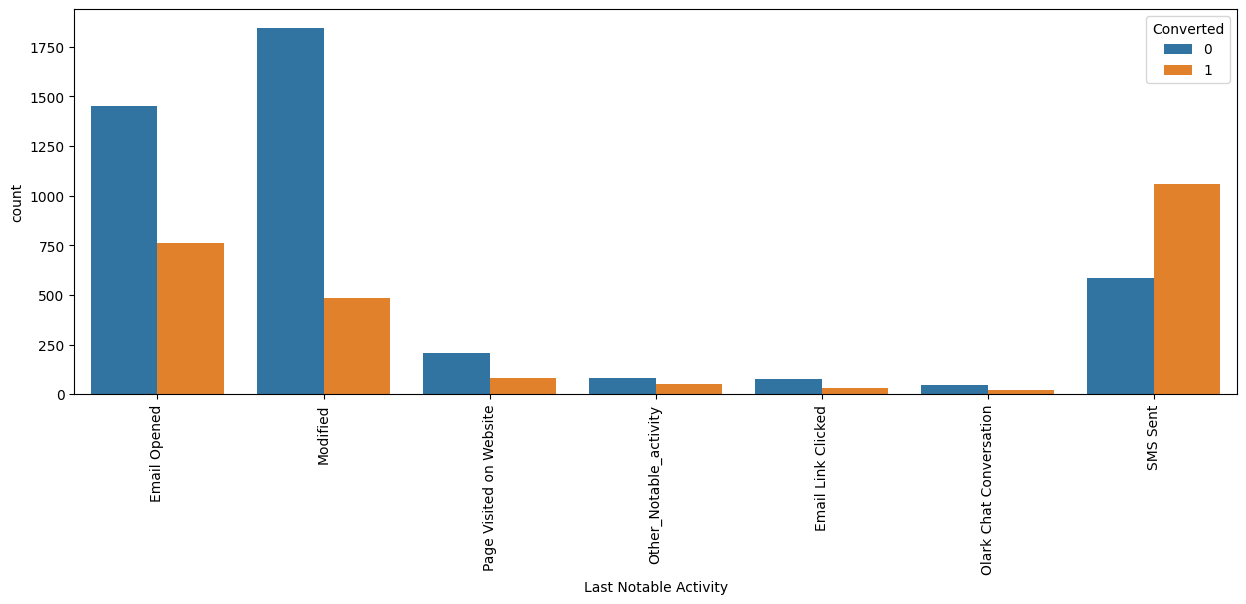

In [68]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Last Notable Activity', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [69]:
#checking value counts for variable

leads['Last Notable Activity'].value_counts()

,count
Last Notable Activity,
Modified,2331
Email Opened,2212
SMS Sent,1643
Page Visited on Website,286
Other_Notable_activity,133
Email Link Clicked,106
Olark Chat Conversation,68


In [70]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [71]:
#dropping columns
leads = leads.drop(cols_to_drop,axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6779 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6779 non-null   object 
 1   Lead Source                             6779 non-null   object 
 2   Do Not Email                            6779 non-null   object 
 3   Converted                               6779 non-null   int64  
 4   TotalVisits                             6779 non-null   float64
 5   Total Time Spent on Website             6779 non-null   int64  
 6   Page Views Per Visit                    6779 non-null   float64
 7   Last Activity                           6779 non-null   object 
 8   Specialization                          6779 non-null   object 
 9   What is your current occupation         6779 non-null   object 
 10  Tags                                    6779 non-null   object 
 

##### Numerical Attributes Analysis:

In [72]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

36.65732408909869

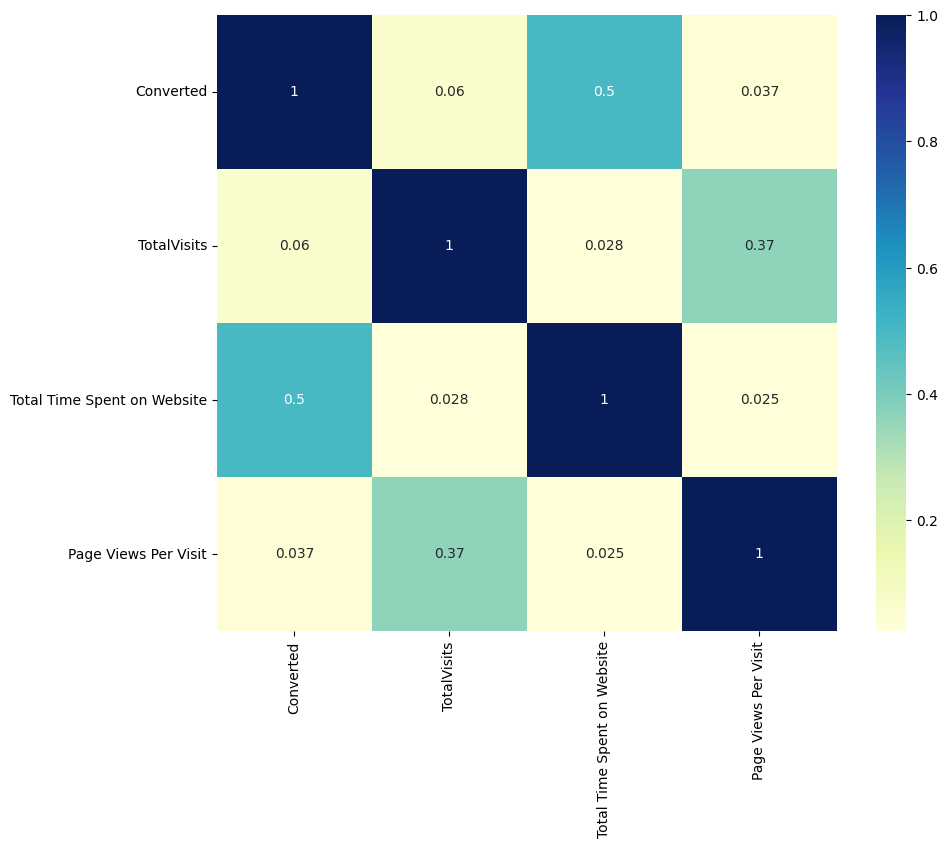

In [73]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), cmap="YlGnBu", annot=True)
plt.show()

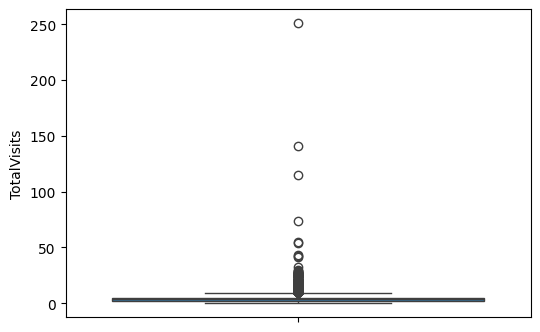

In [74]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

We can see presence of outliers here

In [77]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits
count,6779.000000
mean,4.553917
std,5.138148
min,0.000000
5%,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
90%,8.000000
95%,11.000000


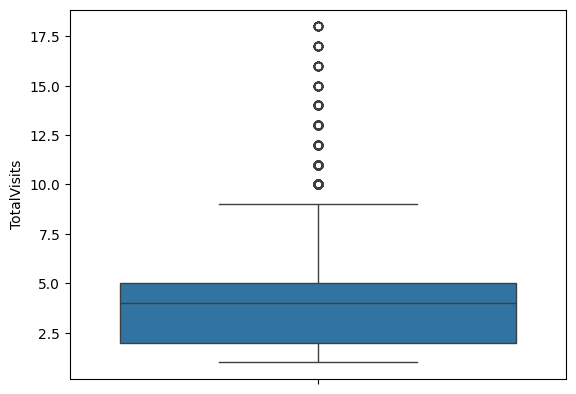

In [78]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [79]:
leads.shape

(6706, 14)

Check for the Next Numerical Column:

In [80]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website
count,6706.000000
mean,631.736206
std,541.763382
min,0.000000
5%,33.000000
25%,171.000000
50%,397.000000
75%,1104.000000
90%,1451.500000
95%,1606.000000


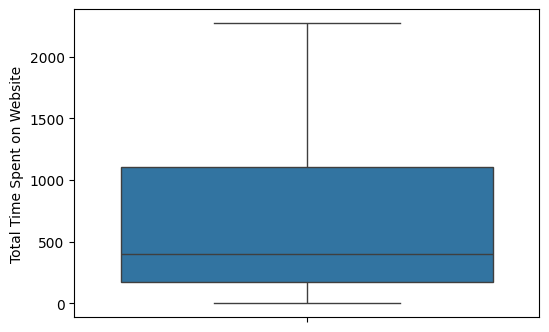

In [81]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

Check for Page Views Per Visit:

In [82]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()

,Page Views Per Visit
count,6706.000000
mean,3.104545
std,1.817244
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,16.000000


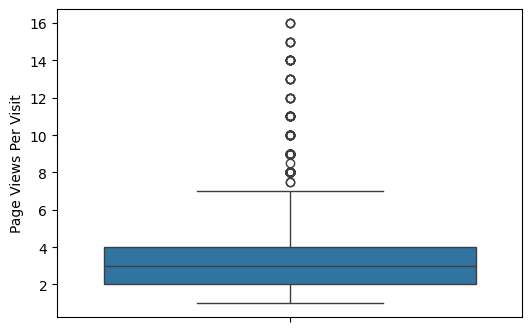

In [83]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

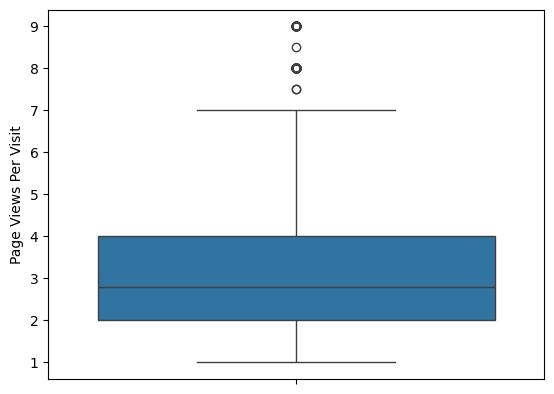

In [84]:
#Outlier Treatment: Remove top & bottom 1%

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [85]:
leads.shape

(6640, 14)

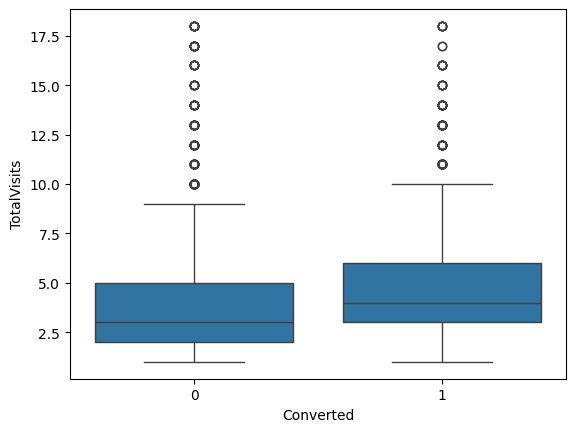

In [86]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

Inference

1. Median for converted and not converted leads are the close.
2. Nothng conclusive can be said on the basis of Total Visits


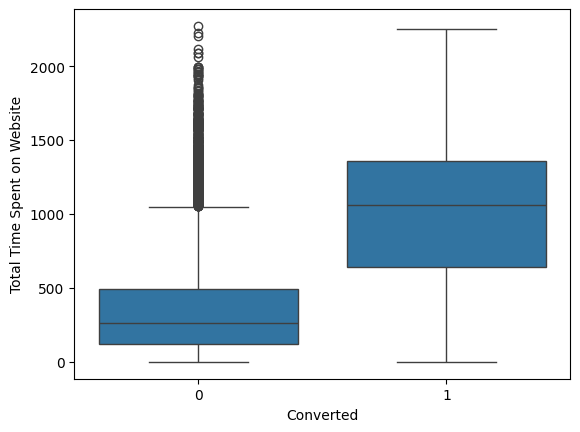

In [87]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Inference

1. Leads spending more time on the website are more likely to be converted.
2. Website should be made more engaging to make leads spend more time.

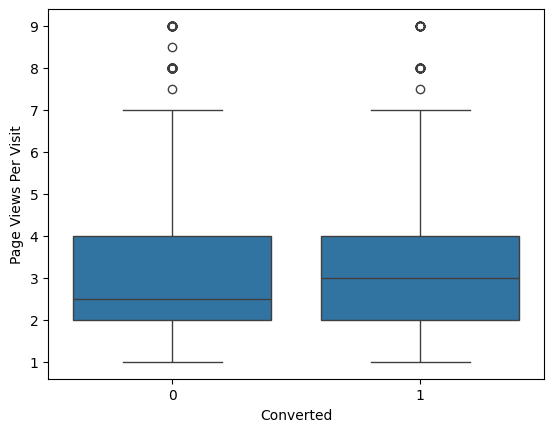

In [88]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

Inference

1. Median for converted and unconverted leads is the same.
2. Nothing can be said specifically for lead conversion from Page Views Per Visit

In [89]:
#checking missing values in leftover columns/

round(100*(leads.isnull().sum()/len(leads.index)),2)

,0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0
Last Activity,0.0
Specialization,0.0
What is your current occupation,0.0


There are no missing values in the columns to be analyzed further

##### Dummy Variable Creation:

In [90]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [91]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [92]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],axis=1)

In [93]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [94]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [95]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [96]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [97]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [98]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,axis=1,inplace = True)

In [99]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1,0,5.0,674,2.5,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,1,2.0,1532,2.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,1.0,305,1.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,1,2.0,1428,1.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
6,1,2.0,1640,2.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [100]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6640 entries, 1 to 9239
Data columns (total 55 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6640 non-null   int64  
 1   TotalVisits                                           6640 non-null   float64
 2   Total Time Spent on Website                           6640 non-null   int64  
 3   Page Views Per Visit                                  6640 non-null   float64
 4   Lead Origin_Landing Page Submission                   6640 non-null   bool   
 5   Lead Origin_Lead Add Form                             6640 non-null   bool   
 6   What is your current occupation_Housewife             6640 non-null   bool   
 7   What is your current occupation_Other                 6640 non-null   bool   
 8   What is your current occupation_Student               6640 non-

In [101]:
leads['Lead Origin_Landing Page Submission']=leads['Lead Origin_Landing Page Submission'].astype(int)
leads['Lead Origin_Lead Add Form']=leads['Lead Origin_Lead Add Form'].astype(int)
leads['What is your current occupation_Working Professional']=leads['What is your current occupation_Working Professional'].astype(int)
leads['City_Other Cities']=leads['City_Other Cities'].astype(int)
leads['City_Other Cities of Maharashtra']=leads['City_Other Cities of Maharashtra'].astype(int)
leads['City_Other Metro Cities']=leads['City_Other Metro Cities'].astype(int)
leads['City_Thane & Outskirts']=leads['City_Thane & Outskirts'].astype(int)
leads['City_Tier II Cities']=leads['City_Tier II Cities'].astype(int)
leads['Specialization_Banking, Investment And Insurance']=leads['Specialization_Banking, Investment And Insurance'].astype(int)
leads['Specialization_Business Administration']=leads['Specialization_Business Administration'].astype(int)
leads['Specialization_E-Business']=leads['Specialization_E-Business'].astype(int)
leads['Specialization_E-COMMERCE']=leads['Specialization_E-COMMERCE'].astype(int)
leads['Specialization_International Business']=leads['Specialization_International Business'].astype(int)
leads['Specialization_Management_Specializations']=leads['Specialization_Management_Specializations'].astype(int)
leads['Specialization_Media and Advertising']=leads['Specialization_Media and Advertising'].astype(int)
leads['Specialization_Rural and Agribusiness']=leads['Specialization_Rural and Agribusiness'].astype(int)
leads['Specialization_Services Excellence']=leads['Specialization_Services Excellence'].astype(int)
leads['Specialization_Travel and Tourism']=leads['Specialization_Travel and Tourism'].astype(int)
leads['Lead Source_Direct Traffic']=leads['Lead Source_Direct Traffic'].astype(int)
leads['Lead Source_Google']=leads['Lead Source_Google'].astype(int)
leads['Lead Source_Olark Chat']=leads['Lead Source_Olark Chat'].astype(int)
leads['Lead Source_Organic Search']=leads['Lead Source_Organic Search'].astype(int)
leads['Lead Source_Reference']=leads['Lead Source_Reference'].astype(int)
leads['Lead Source_Referral Sites']=leads['Lead Source_Referral Sites'].astype(int)
leads['Lead Source_Social Media']=leads['Lead Source_Social Media'].astype(int)
leads['Lead Source_Welingak Website']=leads['Lead Source_Welingak Website'].astype(int)
leads['Last Activity_Converted to Lead']=leads['Last Activity_Converted to Lead'].astype(int)
leads['Last Activity_Email Bounced']=leads['Last Activity_Email Bounced'].astype(int)
leads['Last Activity_Email Link Clicked']=leads['Last Activity_Email Link Clicked'].astype(int)
leads['Last Activity_Email Opened']=leads['Last Activity_Email Opened'].astype(int)
leads['Last Activity_Form Submitted on Website']=leads['Last Activity_Form Submitted on Website'].astype(int)
leads['Last Activity_Olark Chat Conversation']=leads['Last Activity_Olark Chat Conversation'].astype(int)
leads['Last Activity_Page Visited on Website']=leads['Last Activity_Page Visited on Website'].astype(int)
leads['Last Activity_SMS Sent']=leads['Last Activity_SMS Sent'].astype(int)
leads['Last Notable Activity_Email Link Clicked']=leads['Last Notable Activity_Email Link Clicked'].astype(int)
leads['Last Notable Activity_Email Opened']=leads['Last Notable Activity_Email Opened'].astype(int)
leads['Last Notable Activity_Modified']=leads['Last Notable Activity_Modified'].astype(int)
leads['Last Notable Activity_Olark Chat Conversation']=leads['Last Notable Activity_Olark Chat Conversation'].astype(int)
leads['Last Notable Activity_Page Visited on Website']=leads['Last Notable Activity_Page Visited on Website'].astype(int)
leads['Last Notable Activity_SMS Sent']=leads['Last Notable Activity_SMS Sent'].astype(int)
leads['Tags_Busy']=leads['Tags_Busy'].astype(int)
leads['Tags_Closed by Horizzon']=leads['Tags_Closed by Horizzon'].astype(int)
leads['Tags_Interested in other courses']=leads['Tags_Interested in other courses'].astype(int)
leads['Tags_Lost to EINS']=leads['Tags_Lost to EINS'].astype(int)
leads['Tags_Other_Tags']=leads['Tags_Other_Tags'].astype(int)
leads['Tags_Ringing']=leads['Tags_Ringing'].astype(int)
leads['Tags_Will revert after reading the email']=leads['Tags_Will revert after reading the email'].astype(int)
leads['What is your current occupation_Housewife']=leads['What is your current occupation_Housewife'].astype(int)
leads['What is your current occupation_Other']=leads['What is your current occupation_Other'].astype(int)
leads['What is your current occupation_Student']=leads['What is your current occupation_Student'].astype(int)
leads['What is your current occupation_Unemployed']=leads['What is your current occupation_Unemployed'].astype(int)
leads['Last Activity_Page Visited on Website']=leads['Last Activity_Page Visited on Website'].astype(int)


###### Train-Test Split & Logistic Regression Model Building:

In [102]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [103]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4648 entries, 1979 to 7849
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4648 non-null   float64
 1   Total Time Spent on Website                           4648 non-null   int64  
 2   Page Views Per Visit                                  4648 non-null   float64
 3   Lead Origin_Landing Page Submission                   4648 non-null   int64  
 4   Lead Origin_Lead Add Form                             4648 non-null   int64  
 5   What is your current occupation_Housewife             4648 non-null   int64  
 6   What is your current occupation_Other                 4648 non-null   int64  
 7   What is your current occupation_Student               4648 non-null   int64  
 8   What is your current occupation_Unemployed            4648 n

##### Scaling of Data:

In [105]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1979,0.668033,1.836717,1.846001,0.642134,-0.060588,-0.038837,-0.046434,-0.149791,0.324983,-0.271914,...,-0.098875,-0.202449,1.771698,-0.160693,-0.157135,-0.248338,-0.135665,-0.449406,-0.430946,-0.53855
6249,1.418399,1.230405,-0.225650,0.642134,-0.060588,-0.038837,-0.046434,-0.149791,0.324983,-0.271914,...,-0.098875,-0.202449,-0.564430,-0.160693,-0.157135,-0.248338,-0.135665,-0.449406,-0.430946,-0.53855
5557,1.793583,1.857051,3.712353,0.642134,-0.060588,-0.038837,-0.046434,-0.149791,0.324983,-0.271914,...,-0.098875,-0.202449,-0.564430,-0.160693,-0.157135,-0.248338,-0.135665,2.225162,-0.430946,-0.53855
7865,1.793583,-0.645835,3.712353,0.642134,-0.060588,-0.038837,-0.046434,-0.149791,0.324983,-0.271914,...,-0.098875,-0.202449,-0.564430,-0.160693,-0.157135,-0.248338,-0.135665,-0.449406,2.320477,-0.53855
8491,-0.082334,0.086176,0.601766,0.642134,-0.060588,-0.038837,-0.046434,-0.149791,0.324983,-0.271914,...,-0.098875,-0.202449,-0.564430,-0.160693,-0.157135,-0.248338,-0.135665,-0.449406,2.320477,-0.53855


##### Model Building using Stats Model & RFE:

In [106]:
import statsmodels.api as sm

In [107]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [108]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True])

In [109]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Housewife', False, 14),
 ('What is your current occupation_Other', False, 28),
 ('What is your current occupation_Student', False, 4),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', False, 29),
 ('City_Other Cities', False, 40),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 30),
 ('City_Thane & Outskirts', False, 36),
 ('City_Tier II Cities', False, 15),
 ('Specialization_Banking, Investment And Insurance', False, 20),
 ('Specialization_Business Administration', False, 17),
 ('Specialization_E-Business', False, 32),
 ('Specialization_E-COMMERCE', False, 19),
 ('Specialization_International Business', False, 34),
 ('Specialization_Management_Special

In [110]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [111]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Re

In [112]:
X_train[col].columns
X_train[col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4648 entries, 1979 to 7849
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Total Time Spent on Website                 4648 non-null   float64
 1   Lead Origin_Landing Page Submission         4648 non-null   float64
 2   Lead Origin_Lead Add Form                   4648 non-null   float64
 3   What is your current occupation_Unemployed  4648 non-null   float64
 4   Last Activity_Email Bounced                 4648 non-null   float64
 5   Last Activity_Email Opened                  4648 non-null   float64
 6   Last Activity_SMS Sent                      4648 non-null   float64
 7   Last Notable Activity_Modified              4648 non-null   float64
 8   Last Notable Activity_SMS Sent              4648 non-null   float64
 9   Tags_Closed by Horizzon                     4648 non-null   float64
 10  Tags_Intereste

In [113]:
X_train['Lead Origin_Lead Add Form']=X_train['Lead Origin_Lead Add Form'].astype(int)
X_train['What is your current occupation_Working Professional']=X_train['What is your current occupation_Working Professional'].astype(int)
X_train['Last Activity_Converted to Lead']=X_train['Last Activity_Converted to Lead'].astype(int)
X_train['Last Activity_Email Bounced']=X_train['Last Activity_Email Bounced'].astype(int)
X_train['Last Activity_Page Visited on Website']=X_train['Last Activity_Page Visited on Website'].astype(int)
X_train['Last Notable Activity_Modified']=X_train['Last Notable Activity_Modified'].astype(int)
X_train['Last Notable Activity_SMS Sent']=X_train['Last Notable Activity_SMS Sent'].astype(int)
X_train['Tags_Busy']=X_train['Tags_Busy'].astype(int)
X_train['Tags_Closed by Horizzon']=X_train['Tags_Closed by Horizzon'].astype(int)
X_train['Tags_Interested in other courses']=X_train['Tags_Interested in other courses'].astype(int)
X_train['Tags_Lost to EINS']=X_train['Tags_Lost to EINS'].astype(int)
X_train['Tags_Other_Tags']=X_train['Tags_Other_Tags'].astype(int)
X_train['Tags_Ringing']=X_train['Tags_Ringing'].astype(int)
X_train['Tags_Will revert after reading the email']=X_train['Tags_Will revert after reading the email'].astype(int)
X_train['Total Time Spent on Website']=X_train['Total Time Spent on Website'].astype(int)

In [114]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4632
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -958.20
Date:                Mon, 12 Aug 2024   Deviance:                       1916.4
Time:                        02:23:17   Pearson chi2:                 5.78e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5926
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3606      0.139     -9.769      0.000      -1.634      -1.088
Total Time Spent on Website                    1.2083      0.097     12.452      0.000       1.018       1.398
Lead Origin_Landing Page Submission           -0.2748      0.058     -4.718      0.000      -0.389      -0.161
Lead Origin_Lead Add Form                      1.5173   2533.299      0.001      1.000   -4963.658    4966.693
What is your current occupation_Unemployed    -0.2795      0.103     -2.715      0.007      -0.481      -0.078
Last Activity_Email Bounced                   -0.2245      0.108     -2.085      0.037      -0.435      -0.013
Last Activity_Email Opened                     0.1866      0.092      2.019      0.044       0.005       0.368
Last Activity_SMS Sent                         0.5363      0.119      4.516      0.000       0.304       0.769
Last Notable Activity_Modified                -0.6977      0.199     -3.515      0.000      -1.087      -0.309
Last Notable Activity_SMS Sent                 1.3491      0.302      4.463      0.000       0.757       1.942
Tags_Closed by Horizzon                        4.5283   3116.758      0.001      0.999   -6104.204    6113.261
Tags_Interested in other courses              -0.5300      0.106     -5.021      0.000      -0.737      -0.323
Tags_Lost to EINS                              0.7481      0.087      8.590      0.000       0.577       0.919
Tags_Other_Tags                               -1.3032      0.119    -10.987      0.000      -1.536      -1.071
Tags_Ringing                                  -1.7255      0.139    -12.451      0.000      -1.997      -1.454
Tags_Will revert after reading the email       4.6822      0.228     20.528      0.000       4.235       5.129
==============================================================================================================
"""

p-value of variable Lead Origin_Lead Add Form is high, so we can drop it.

In [115]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Add Form',1)

In [116]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4633
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -961.37
Date:                Mon, 12 Aug 2024   Deviance:                       1922.7
Time:                        02:23:42   Pearson chi2:                 5.78e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5920
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3422      0.139     -9.678      0.000      -1.614      -1.070
Total Time Spent on Website                    1.2055      0.097     12.434      0.000       1.015       1.396
Lead Origin_Landing Page Submission           -0.2809      0.058     -4.834      0.000      -0.395      -0.167
What is your current occupation_Unemployed    -0.2790      0.103     -2.713      0.007      -0.481      -0.077
Last Activity_Email Bounced                   -0.2260      0.108     -2.101      0.036      -0.437      -0.015
Last Activity_Email Opened                     0.1787      0.092      1.944      0.052      -0.001       0.359
Last Activity_SMS Sent                         0.5347      0.119      4.506      0.000       0.302       0.767
Last Notable Activity_Modified                -0.7186      0.198     -3.629      0.000      -1.107      -0.331
Last Notable Activity_SMS Sent                 1.3283      0.302      4.399      0.000       0.736       1.920
Tags_Closed by Horizzon                        4.3810   1947.821      0.002      0.998   -3813.278    3822.040
Tags_Interested in other courses              -0.5316      0.106     -5.039      0.000      -0.738      -0.325
Tags_Lost to EINS                              0.7482      0.087      8.590      0.000       0.577       0.919
Tags_Other_Tags                               -1.3049      0.119    -11.007      0.000      -1.537      -1.073
Tags_Ringing                                  -1.7261      0.139    -12.462      0.000      -1.998      -1.455
Tags_Will revert after reading the email       4.6773      0.228     20.513      0.000       4.230       5.124
==============================================================================================================
"""

p-value of variable Tags_Closed by Horizzon is high, so we can drop it.

In [117]:
#dropping column with high p-value

col = col.drop('Tags_Closed by Horizzon',1)

In [118]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4634
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1113.2
Date:                Mon, 12 Aug 2024   Deviance:                       2226.3
Time:                        02:23:46   Pearson chi2:                 5.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5645
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.2156      0.122     -9.936      0.000      -1.455      -0.976
Total Time Spent on Website                    1.2086      0.090     13.491      0.000       1.033       1.384
Lead Origin_Landing Page Submission           -0.1834      0.053     -3.460      0.001      -0.287      -0.080
What is your current occupation_Unemployed    -0.5637      0.076     -7.442      0.000      -0.712      -0.415
Last Activity_Email Bounced                   -0.3018      0.095     -3.192      0.001      -0.487      -0.116
Last Activity_Email Opened                     0.2837      0.078      3.640      0.000       0.131       0.437
Last Activity_SMS Sent                         0.2588      0.107      2.410      0.016       0.048       0.469
Last Notable Activity_Modified                -0.1671      0.160     -1.047      0.295      -0.480       0.146
Last Notable Activity_SMS Sent                 1.8731      0.275      6.809      0.000       1.334       2.412
Tags_Interested in other courses              -0.6677      0.103     -6.470      0.000      -0.870      -0.465
Tags_Lost to EINS                              0.6577      0.086      7.635      0.000       0.489       0.827
Tags_Other_Tags                               -1.5058      0.117    -12.817      0.000      -1.736      -1.276
Tags_Ringing                                  -1.8189      0.138    -13.195      0.000      -2.089      -1.549
Tags_Will revert after reading the email       4.1884      0.218     19.202      0.000       3.761       4.616
==============================================================================================================
"""

p-value of variable Last Notable Activity_Modified is high, so we can drop it.

In [119]:
#dropping column with high p-value

col = col.drop('Last Notable Activity_Modified',1)

In [121]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4635
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1113.7
Date:                Mon, 12 Aug 2024   Deviance:                       2227.4
Time:                        02:24:42   Pearson chi2:                 5.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5644
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3109      0.083    -15.853      0.000      -1.473      -1.149
Total Time Spent on Website                    1.2074      0.090     13.485      0.000       1.032       1.383
Lead Origin_Landing Page Submission           -0.1852      0.053     -3.497      0.000      -0.289      -0.081
What is your current occupation_Unemployed    -0.5633      0.076     -7.439      0.000      -0.712      -0.415
Last Activity_Email Bounced                   -0.3069      0.094     -3.251      0.001      -0.492      -0.122
Last Activity_Email Opened                     0.3214      0.069      4.640      0.000       0.186       0.457
Last Activity_SMS Sent                         0.2313      0.104      2.225      0.026       0.028       0.435
Last Notable Activity_SMS Sent                 2.0394      0.225      9.071      0.000       1.599       2.480
Tags_Interested in other courses              -0.6775      0.103     -6.597      0.000      -0.879      -0.476
Tags_Lost to EINS                              0.6535      0.086      7.588      0.000       0.485       0.822
Tags_Other_Tags                               -1.5052      0.117    -12.824      0.000      -1.735      -1.275
Tags_Ringing                                  -1.8165      0.138    -13.177      0.000      -2.087      -1.546
Tags_Will revert after reading the email       4.1997      0.218     19.267      0.000       3.773       4.627
==============================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [122]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Notable Activity_SMS Sent,3.72
5,Last Activity_SMS Sent,3.52
4,Last Activity_Email Opened,1.58
11,Tags_Will revert after reading the email,1.58
10,Tags_Ringing,1.21
9,Tags_Other_Tags,1.17
2,What is your current occupation_Unemployed,1.14
3,Last Activity_Email Bounced,1.14
0,Total Time Spent on Website,1.10
7,Tags_Interested in other courses,1.07


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [124]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
1979,0.848258
6249,0.459635
5557,0.040222
7865,0.006678
8491,0.006678
2573,0.276519
474,0.165300
4477,0.970858
1952,0.070665
1816,0.003471


In [125]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84825822, 0.45963515, 0.04022156, 0.00667806, 0.00667806,
       0.27651922, 0.16530021, 0.97085841, 0.07066472, 0.00347132])

In [126]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.848258,1979
1,0,0.459635,6249
2,0,0.040222,5557
3,0,0.006678,7865
4,0,0.006678,8491


In [127]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.848258,1979,1
1,0,0.459635,6249,0
2,0,0.040222,5557,0
3,0,0.006678,7865,0
4,0,0.006678,8491,0


In [128]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2824  137]
 [ 306 1381]]


In [130]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)*100)

90.46901893287436


In [131]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
round((TP / float(TP+FN))*100,2)

81.86

In [135]:
# Let us calculate specificity
round((TN / float(TN+FP))*100,2)

95.37

In [136]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04626815265113138


In [137]:
# positive predictive value
print (TP / float(TP+FP))

0.9097496706192358


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9022364217252397


##### PLOTTING ROC CURVE


In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

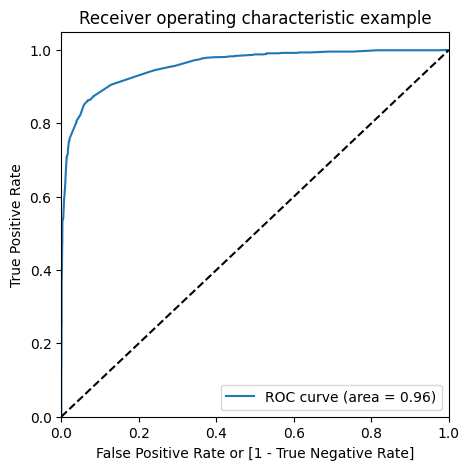

In [141]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

##### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [142]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.848258,1979,1,1,1,1,1,1,1,1,1,1,0
1,0,0.459635,6249,0,1,1,1,1,1,0,0,0,0,0
2,0,0.040222,5557,0,1,0,0,0,0,0,0,0,0,0
3,0,0.006678,7865,0,1,0,0,0,0,0,0,0,0,0
4,0,0.006678,8491,0,1,0,0,0,0,0,0,0,0,0


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.362952  1.000000  0.000000
0.1   0.1  0.761618  0.975697  0.639649
0.2   0.2  0.840792  0.935981  0.786559
0.3   0.3  0.901463  0.873740  0.917258
0.4   0.4  0.908133  0.854772  0.938534
0.5   0.5  0.904690  0.818613  0.953732
0.6   0.6  0.903614  0.802608  0.961162
0.7   0.7  0.897160  0.751630  0.980074
0.8   0.8  0.885112  0.708358  0.985816
0.9   0.9  0.856282  0.620628  0.990544


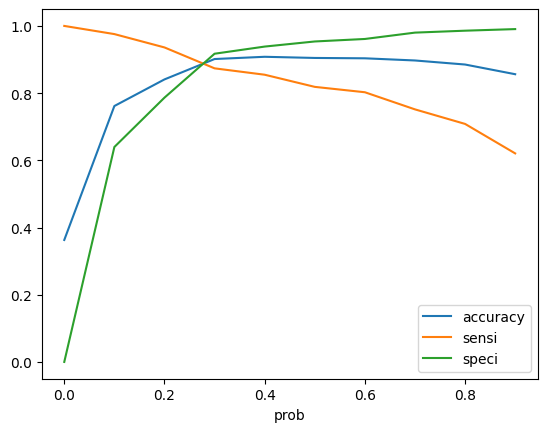

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [145]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.848258,1979,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.459635,6249,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.040222,5557,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.006678,7865,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.006678,8491,0,1,0,0,0,0,0,0,0,0,0,0


In [146]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.848258,1979,1,85
1,0,0.459635,6249,1,46
2,0,0.040222,5557,0,4
3,0,0.006678,7865,0,1
4,0,0.006678,8491,0,1


In [147]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted),2)*100

90.0

In [148]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2716,  245],
       [ 213, 1474]])

In [149]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)*100

87.0

In [151]:
# Let us calculate specificity
round(TN / float(TN+FP),2)*100

92.0

Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.9, which is very good. We have the following values for the Train Data:


Accuracy : 90%

Sensitivity : 87%

Specificity : 92%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [1305]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.08274231678486997


In [152]:
# Positive predictive value
print (TP / float(TP+FP))

0.8574752763234439


In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9272789347900308


In [154]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2716,  245],
       [ 213, 1474]])

In [155]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8574752763234439

In [156]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8737403675163011

In [157]:
from sklearn.metrics import precision_score, recall_score

In [158]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8574752763234439

In [159]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8737403675163011

In [160]:
from sklearn.metrics import precision_recall_curve

In [161]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

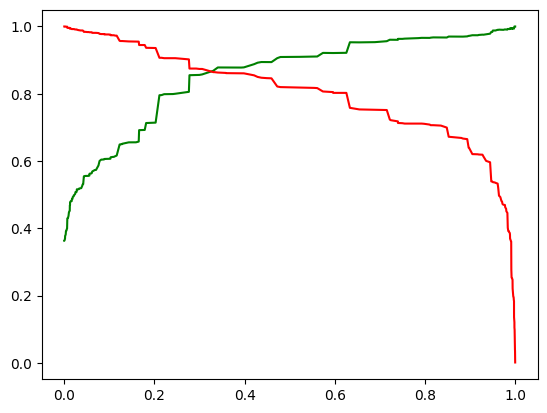

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [163]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-1.144209,-0.560701,-1.266390,-1.648156,-0.050163,0.0,-0.038837,-0.133733,0.315179,-0.27705,...,-0.105676,-0.203215,-0.572713,-0.168506,-0.158804,3.881303,-0.152028,-0.454468,-0.422727,-0.545637
8280,-0.783851,-0.236439,-0.628396,-1.648156,-0.050163,0.0,-0.038837,-0.133733,0.315179,-0.27705,...,-0.105676,-0.203215,-0.572713,-0.168506,-0.158804,-0.257645,-0.152028,-0.454468,-0.422727,-0.545637
6941,-0.783851,-1.021301,-1.266390,-1.648156,-0.050163,0.0,-0.038837,-0.133733,0.315179,-0.27705,...,-0.105676,-0.203215,-0.572713,-0.168506,-0.158804,3.881303,-0.152028,-0.454468,-0.422727,-0.545637
7343,4.621518,0.028867,-0.545456,0.606739,-0.050163,0.0,-0.038837,-0.133733,0.315179,-0.27705,...,-0.105676,-0.203215,-0.572713,-0.168506,-0.158804,-0.257645,-0.152028,-0.454468,-0.422727,1.832720
3734,-0.063135,-0.582810,0.647593,0.606739,-0.050163,0.0,-0.038837,-0.133733,0.315179,-0.27705,...,-0.105676,-0.203215,-0.572713,-0.168506,-0.158804,-0.257645,-0.152028,-0.454468,-0.422727,-0.545637


In [164]:
X_test = X_test[col]
X_test.head()

X_test['Total Time Spent on Website']=X_test['Total Time Spent on Website'].astype(int)
X_test['Last Activity_Email Bounced']=X_test['Last Activity_Email Bounced'].astype(int)
X_test['Last Notable Activity_SMS Sent']=X_test['Last Notable Activity_SMS Sent'].astype(int)
X_test['Tags_Interested in other courses']=X_test['Tags_Interested in other courses'].astype(int)
X_test['Tags_Lost to EINS']=X_test['Tags_Lost to EINS'].astype(int)
X_test['Tags_Other_Tags']=X_test['Tags_Other_Tags'].astype(int)
X_test['Tags_Ringing']=X_test['Tags_Ringing'].astype(int)
X_test['Tags_Will revert after reading the email']=X_test['Tags_Will revert after reading the email'].astype(int)

In [165]:
X_test_sm = sm.add_constant(X_test)

##### PREDICTIONS ON TEST SET

In [166]:
y_test_pred = res.predict(X_test_sm)

In [167]:
y_test_pred[:10]

,0
8970,0.025954
8280,0.282436
6941,0.015184
7343,0.899294
3734,0.118124
7889,0.720495
837,0.015184
8227,0.042951
7245,0.999211
8622,0.928953


In [168]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [169]:
# Let's see the head
y_pred_1.head()

,0
8970,0.025954
8280,0.282436
6941,0.015184
7343,0.899294
3734,0.118124


In [170]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [171]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [172]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [173]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [174]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8970,0.025954
1,0,8280,0.282436
2,0,6941,0.015184
3,0,7343,0.899294
4,0,3734,0.118124


In [176]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [177]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8970,0.025954
1,0,8280,0.282436
2,0,6941,0.015184
3,0,7343,0.899294
4,0,3734,0.118124


In [178]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [179]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8970,0,0.025954,3
1,8280,0,0.282436,28
2,6941,0,0.015184,2
3,7343,0,0.899294,90
4,3734,0,0.118124,12


In [180]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [181]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8970,0,0.025954,3,0
1,8280,0,0.282436,28,0
2,6941,0,0.015184,2,0
3,7343,0,0.899294,90,1
4,3734,0,0.118124,12,0


In [182]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted),2)*100

91.0

In [183]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1157,  101],
       [  86,  648]])

In [184]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [185]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)*100

88.0

In [186]:
# Let us calculate specificity
round(TN / float(TN+FP),2)*100

92.0

In [187]:
round(precision_score(y_pred_final.Converted , y_pred_final.final_Predicted),2)*100

87.0

In [188]:
round(recall_score(y_pred_final.Converted, y_pred_final.final_Predicted),2)*100

88.0

**Observation**:
    
After running the model on the Test Data these are the figures we obtain:
    

Accuracy : 91%
    
Sensitivity : 88%
    
Specificity : 92%
    
    
**Final Observation:**
    
Let us compare the values obtained for Train & Test:
    

**Train Data:**
    
Accuracy : 90%

Sensitivity : 87%

Specificity : 92%

    
**Test Data: **

Accuracy : 91%
    
Sensitivity : 88%
    
Specificity : 92%
    
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

**Recommendations**


To increase our Lead Conversion Rates:


1. Develop strategies to attract high-quality leads from top-performing lead sources.

2. Engage working professionals with tailored messaging.

3. Optimize communication channels based on lead engagement impact.

4. More budget/spend can be done on Welingak Website in terms of advertising, etc.
Incentives/discounts for providing reference that convert to lead, encourage providing more references.

5. Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too.